In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPool2D,UpSampling2D
from keras.models import Model
from keras.optimizers import  RMSprop

def extract_data(filename,num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_imagesz
        data = np.frombuffer(buf,dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images,28,28)
        return data


train_data = extract_data('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\train-images-idx3-ubyte.gz',60000)
test_data = extract_data('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\t10k-images-idx3-ubyte.gz',10000)

def extract_labels(filename,num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1*num_images)
        labels = np.frombuffer(buf,dtype=np.uint8).astype(np.int64)
        return labels
train_labels = extract_labels('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\train-labels-idx1-ubyte.gz',60000)
test_labels = extract_labels('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\t10k-labels-idx1-ubyte.gz',10000)



C:\Users\HyunA\AppData\Local\conda\conda\envs\tutorial\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
#shape of training set
print("Training set (images) shape : {shape}".format(shape=train_data.shape))

# shape of test set
print("Test set (images) shape : {shape}".format(shape=test_data.shape))

# shape of train labels set
print("Training set (labels) shape : {shape}".format(shape=train_labels.shape))

# shape of test labels set
print("Test set (labels) shape : {shape}".format(shape=test_labels.shape))

Training set (images) shape : (60000, 28, 28)
Test set (images) shape : (10000, 28, 28)
Training set (labels) shape : (60000,)
Test set (labels) shape : (10000,)


In [9]:
# create dictionary of target classes 
label_dict = {
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
    7:'H',
    8:'I',
    9:'J'
}
print(label_dict[0])

A


Text(0.5,1,'(Label:D)')

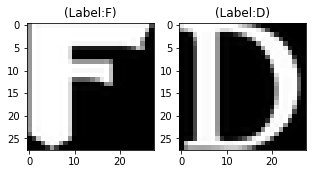

In [11]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_image = np.reshape(train_data[0],(28,28))
curr_lbl = train_labels[0]
plt.imshow(curr_image,cmap='gray')
plt.title("(Label:"+str(label_dict[curr_lbl])+")")        

# Display the first image in test data
plt.subplot(122)
curr_image = np.reshape(test_data[0],(28,28))
curr_lbl = test_labels[0]
plt.imshow(curr_image,cmap='gray')
plt.title("(Label:"+str(label_dict[curr_lbl])+")")       

In [13]:
train_data = train_data.reshape(-1,28,28,1)
test_data = test_data.reshape(-1,28,28,1)
# 반드시 float32 format이여야함    

In [15]:
# 데이터 타입 확인하기 
train_data.dtype, test_data.dtype

(dtype('float32'), dtype('float32'))

In [18]:
# 0-1 사이 값으로 rescale 하기
# np.max(train_data),np.max(test_data)

train_data = train_data/np.max(train_data)
test_data = test_data/np.max(test_data)

np.max(train_data),np.max(test_data)


(1.0, 1.0)

In [20]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_ground,valid_ground = train_test_split(train_data,train_data,test_size=0.2, random_state=13)


In [40]:
# convolustional autoencoder
batch_size = 200
epoch = 2
inChannel = 1
x, y= 28,28
input_img = Input(shape=(x,y,inChannel))


In [41]:
def autoencoder(input_img):
    # encoder
    # input = 28*28*1 
    conv1 = Conv2D(32,(3,3), activation='relu', padding='same')(input_img) # 28*28*32
    pool1 = MaxPool2D(pool_size=(2,2))(conv1) # 14*14*32
    conv2 = Conv2D(64,(3,3),activation='relu',padding='same')(pool1) # 14*14*64
    pool2 = MaxPool2D(pool_size=(2,2))(conv2) # 7*7*64
    conv3 = Conv2D(128,(3,3),activation='relu',padding='same')(pool2) # 7*7*128
    
    
    #decoder
    conv4 = Conv2D(128,(3,3),activation='relu',padding='same')(conv3) # 7*7*128
    up1 = UpSampling2D((2,2))(conv4) # 14*14*128
    conv5 = Conv2D(64,(3,3),activation='relu',padding='same')(up1) # 14*14*64
    up2 = UpSampling2D((2,2))(conv5)
    decoded = Conv2D(1,(3,3), activation='sigmoid',padding='same')(up2) # 28*28*1
    
    return decoded


In [42]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer=RMSprop())


In [43]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         147584    
__________

In [44]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size= batch_size, epochs= epoch, verbose =1
                                    ,validation_data=(valid_X,valid_ground) )                                        

Train on 48000 samples, validate on 12000 samples
Epoch 1/2


  200/48000 [..............................] - ETA: 9:35 - loss: 0.2137

  400/48000 [..............................] - ETA: 8:23 - loss: 0.2073

  600/48000 [..............................] - ETA: 7:54 - loss: 0.2621

  800/48000 [..............................] - ETA: 7:27 - loss: 0.2466

 1000/48000 [..............................] - ETA: 7:11 - loss: 0.2313

 1200/48000 [..............................] - ETA: 7:00 - loss: 0.2412

 1400/48000 [..............................] - ETA: 6:51 - loss: 0.2367

 1600/48000 [>.............................] - ETA: 6:43 - loss: 0.2276

 1800/48000 [>.............................] - ETA: 6:38 - loss: 0.2166

 2000/48000 [>.............................] - ETA: 6:34 - loss: 0.2073

 2200/48000 [>.............................] - ETA: 6:29 - loss: 0.1999

 2400/48000 [>.............................] - ETA: 6:26 - loss: 0.2034

 2600/48000 [>.............................] - ETA: 6:23 - loss: 0.2010

 2800/48000 [>.............................] - ETA: 6:19 - loss: 0.1946

 3000/48000 [>.............................] - ETA: 6:16 - loss: 0.1884

 3200/48000 [=>............................] - ETA: 6:13 - loss: 0.1826

 3400/48000 [=>............................] - ETA: 6:11 - loss: 0.1770

 3600/48000 [=>............................] - ETA: 6:08 - loss: 0.1717

 3800/48000 [=>............................] - ETA: 6:06 - loss: 0.1674

 4000/48000 [=>............................] - ETA: 6:03 - loss: 0.1663

 4200/48000 [=>............................] - ETA: 6:01 - loss: 0.1643

 4400/48000 [=>............................] - ETA: 6:00 - loss: 0.1611

 4600/48000 [=>............................] - ETA: 5:58 - loss: 0.1575

 4800/48000 [==>...........................] - ETA: 5:56 - loss: 0.1539

 5000/48000 [==>...........................] - ETA: 5:55 - loss: 0.1504

 5200/48000 [==>...........................] - ETA: 5:56 - loss: 0.1470

 5400/48000 [==>...........................] - ETA: 5:54 - loss: 0.1450

 5600/48000 [==>...........................] - ETA: 5:52 - loss: 0.1470

 5800/48000 [==>...........................] - ETA: 5:51 - loss: 0.1449

 6000/48000 [==>...........................] - ETA: 5:49 - loss: 0.1425

 6200/48000 [==>...........................] - ETA: 5:48 - loss: 0.1401

 6400/48000 [===>..........................] - ETA: 5:46 - loss: 0.1377

 6600/48000 [===>..........................] - ETA: 5:44 - loss: 0.1357

 6800/48000 [===>..........................] - ETA: 5:42 - loss: 0.1341

 7000/48000 [===>..........................] - ETA: 5:40 - loss: 0.1326

 7200/48000 [===>..........................] - ETA: 5:38 - loss: 0.1314

 7400/48000 [===>..........................] - ETA: 5:36 - loss: 0.1298

 7600/48000 [===>..........................] - ETA: 5:34 - loss: 0.1281

 7800/48000 [===>..........................] - ETA: 5:32 - loss: 0.1263

 8000/48000 [====>.........................] - ETA: 5:30 - loss: 0.1247

 8200/48000 [====>.........................] - ETA: 5:28 - loss: 0.1232

 8400/48000 [====>.........................] - ETA: 5:26 - loss: 0.1219

 8600/48000 [====>.........................] - ETA: 5:24 - loss: 0.1207

 8800/48000 [====>.........................] - ETA: 5:22 - loss: 0.1194

 9000/48000 [====>.........................] - ETA: 5:20 - loss: 0.1180

 9200/48000 [====>.........................] - ETA: 5:18 - loss: 0.1169

 9400/48000 [====>.........................] - ETA: 5:16 - loss: 0.1159

 9600/48000 [=====>........................] - ETA: 5:15 - loss: 0.1150

 9800/48000 [=====>........................] - ETA: 5:13 - loss: 0.1140

10000/48000 [=====>........................] - ETA: 5:11 - loss: 0.1128

10200/48000 [=====>........................] - ETA: 5:09 - loss: 0.1116

10400/48000 [=====>........................] - ETA: 5:07 - loss: 0.1105

10600/48000 [=====>........................] - ETA: 5:05 - loss: 0.1095

10800/48000 [=====>........................] - ETA: 5:04 - loss: 0.1087

11000/48000 [=====>........................] - ETA: 5:02 - loss: 0.1077

11200/48000 [======>.......................] - ETA: 5:00 - loss: 0.1068

11400/48000 [======>.......................] - ETA: 4:58 - loss: 0.1058

11600/48000 [======>.......................] - ETA: 4:57 - loss: 0.1048

11800/48000 [======>.......................] - ETA: 4:55 - loss: 0.1038

12000/48000 [======>.......................] - ETA: 4:54 - loss: 0.1029

12200/48000 [======>.......................] - ETA: 4:52 - loss: 0.1022

12400/48000 [======>.......................] - ETA: 4:51 - loss: 0.1016

12600/48000 [======>.......................] - ETA: 4:49 - loss: 0.1008

12800/48000 [=======>......................] - ETA: 4:48 - loss: 0.0999

13000/48000 [=======>......................] - ETA: 4:47 - loss: 0.0991

13200/48000 [=======>......................] - ETA: 4:46 - loss: 0.0982

13400/48000 [=======>......................] - ETA: 4:45 - loss: 0.0974

13600/48000 [=======>......................] - ETA: 4:45 - loss: 0.0969

13800/48000 [=======>......................] - ETA: 4:44 - loss: 0.0964

14000/48000 [=======>......................] - ETA: 4:43 - loss: 0.0958

14200/48000 [=======>......................] - ETA: 4:44 - loss: 0.0950

14400/48000 [========>.....................] - ETA: 4:43 - loss: 0.0941

14600/48000 [========>.....................] - ETA: 4:43 - loss: 0.0933

14800/48000 [========>.....................] - ETA: 4:41 - loss: 0.0925

15000/48000 [========>.....................] - ETA: 4:40 - loss: 0.0919

15200/48000 [========>.....................] - ETA: 4:40 - loss: 0.0915

15400/48000 [========>.....................] - ETA: 4:39 - loss: 0.0912

15600/48000 [========>.....................] - ETA: 4:37 - loss: 0.0906

15800/48000 [========>.....................] - ETA: 4:36 - loss: 0.0899

16000/48000 [=========>....................] - ETA: 4:34 - loss: 0.0892

16200/48000 [=========>....................] - ETA: 4:32 - loss: 0.0884

16400/48000 [=========>....................] - ETA: 4:31 - loss: 0.0877

16600/48000 [=========>....................] - ETA: 4:29 - loss: 0.0871

16800/48000 [=========>....................] - ETA: 4:28 - loss: 0.0867

17000/48000 [=========>....................] - ETA: 4:26 - loss: 0.0864

17200/48000 [=========>....................] - ETA: 4:24 - loss: 0.0860

17400/48000 [=========>....................] - ETA: 4:23 - loss: 0.0855

17600/48000 [==========>...................] - ETA: 4:22 - loss: 0.0849

17800/48000 [==========>...................] - ETA: 4:20 - loss: 0.0843

18000/48000 [==========>...................] - ETA: 4:19 - loss: 0.0837

18200/48000 [==========>...................] - ETA: 4:17 - loss: 0.0832

18400/48000 [==========>...................] - ETA: 4:15 - loss: 0.0827

18600/48000 [==========>...................] - ETA: 4:14 - loss: 0.0823

18800/48000 [==========>...................] - ETA: 4:13 - loss: 0.0818

19000/48000 [==========>...................] - ETA: 4:11 - loss: 0.0814

19200/48000 [===========>..................] - ETA: 4:09 - loss: 0.0809

19400/48000 [===========>..................] - ETA: 4:07 - loss: 0.0804

19600/48000 [===========>..................] - ETA: 4:05 - loss: 0.0799

19800/48000 [===========>..................] - ETA: 4:03 - loss: 0.0795

20000/48000 [===========>..................] - ETA: 4:01 - loss: 0.0792

20200/48000 [===========>..................] - ETA: 3:59 - loss: 0.0789

20400/48000 [===========>..................] - ETA: 3:57 - loss: 0.0785

20600/48000 [===========>..................] - ETA: 3:56 - loss: 0.0780

20800/48000 [============>.................] - ETA: 3:54 - loss: 0.0775

21000/48000 [============>.................] - ETA: 3:52 - loss: 0.0770

21200/48000 [============>.................] - ETA: 3:50 - loss: 0.0766

21400/48000 [============>.................] - ETA: 3:48 - loss: 0.0763

21600/48000 [============>.................] - ETA: 3:46 - loss: 0.0760

21800/48000 [============>.................] - ETA: 3:45 - loss: 0.0757

22000/48000 [============>.................] - ETA: 3:43 - loss: 0.0754

22200/48000 [============>.................] - ETA: 3:41 - loss: 0.0750

22400/48000 [=============>................] - ETA: 3:39 - loss: 0.0746

22600/48000 [=============>................] - ETA: 3:37 - loss: 0.0741

22800/48000 [=============>................] - ETA: 3:36 - loss: 0.0737

23000/48000 [=============>................] - ETA: 3:34 - loss: 0.0734

23200/48000 [=============>................] - ETA: 3:32 - loss: 0.0731

23400/48000 [=============>................] - ETA: 3:31 - loss: 0.0728

23600/48000 [=============>................] - ETA: 3:29 - loss: 0.0725

23800/48000 [=============>................] - ETA: 3:27 - loss: 0.0721

24000/48000 [==============>...............] - ETA: 3:25 - loss: 0.0717

24200/48000 [==============>...............] - ETA: 3:24 - loss: 0.0714

24400/48000 [==============>...............] - ETA: 3:22 - loss: 0.0711

24600/48000 [==============>...............] - ETA: 3:21 - loss: 0.0708

24800/48000 [==============>...............] - ETA: 3:19 - loss: 0.0706

25000/48000 [==============>...............] - ETA: 3:18 - loss: 0.0703

25200/48000 [==============>...............] - ETA: 3:16 - loss: 0.0700

25400/48000 [==============>...............] - ETA: 3:14 - loss: 0.0696

25600/48000 [===============>..............] - ETA: 3:13 - loss: 0.0693

25800/48000 [===============>..............] - ETA: 3:11 - loss: 0.0689

26000/48000 [===============>..............] - ETA: 3:10 - loss: 0.0686

26200/48000 [===============>..............] - ETA: 3:08 - loss: 0.0683

26400/48000 [===============>..............] - ETA: 3:06 - loss: 0.0681

26600/48000 [===============>..............] - ETA: 3:05 - loss: 0.0678

26800/48000 [===============>..............] - ETA: 3:03 - loss: 0.0675

27000/48000 [===============>..............] - ETA: 3:01 - loss: 0.0672

27200/48000 [================>.............] - ETA: 2:59 - loss: 0.0669

27400/48000 [================>.............] - ETA: 2:57 - loss: 0.0666

27600/48000 [================>.............] - ETA: 2:56 - loss: 0.0663

27800/48000 [================>.............] - ETA: 2:54 - loss: 0.0661

28000/48000 [================>.............] - ETA: 2:53 - loss: 0.0659

28200/48000 [================>.............] - ETA: 2:51 - loss: 0.0656

28400/48000 [================>.............] - ETA: 2:49 - loss: 0.0653

28600/48000 [================>.............] - ETA: 2:47 - loss: 0.0651

28800/48000 [=================>............] - ETA: 2:46 - loss: 0.0648

29000/48000 [=================>............] - ETA: 2:44 - loss: 0.0645

29200/48000 [=================>............] - ETA: 2:42 - loss: 0.0642

29400/48000 [=================>............] - ETA: 2:41 - loss: 0.0640

29600/48000 [=================>............] - ETA: 2:39 - loss: 0.0637

29800/48000 [=================>............] - ETA: 2:37 - loss: 0.0635

30000/48000 [=================>............] - ETA: 2:35 - loss: 0.0633

30200/48000 [=================>............] - ETA: 2:34 - loss: 0.0630

30400/48000 [==================>...........] - ETA: 2:32 - loss: 0.0628

30600/48000 [==================>...........] - ETA: 2:30 - loss: 0.0625

30800/48000 [==================>...........] - ETA: 2:29 - loss: 0.0623

31000/48000 [==================>...........] - ETA: 2:27 - loss: 0.0621

31200/48000 [==================>...........] - ETA: 2:25 - loss: 0.0618

31400/48000 [==================>...........] - ETA: 2:23 - loss: 0.0616

31600/48000 [==================>...........] - ETA: 2:22 - loss: 0.0613

31800/48000 [==================>...........] - ETA: 2:20 - loss: 0.0611

32000/48000 [===================>..........] - ETA: 2:18 - loss: 0.0609

32200/48000 [===================>..........] - ETA: 2:17 - loss: 0.0607

32400/48000 [===================>..........] - ETA: 2:15 - loss: 0.0605

32600/48000 [===================>..........] - ETA: 2:13 - loss: 0.0603

32800/48000 [===================>..........] - ETA: 2:11 - loss: 0.0601

33000/48000 [===================>..........] - ETA: 2:10 - loss: 0.0599

33200/48000 [===================>..........] - ETA: 2:08 - loss: 0.0597

33400/48000 [===================>..........] - ETA: 2:06 - loss: 0.0594

33600/48000 [====================>.........] - ETA: 2:05 - loss: 0.0592

33800/48000 [====================>.........] - ETA: 2:03 - loss: 0.0590

34000/48000 [====================>.........] - ETA: 2:02 - loss: 0.0588

34200/48000 [====================>.........] - ETA: 2:00 - loss: 0.0586

34400/48000 [====================>.........] - ETA: 1:58 - loss: 0.0584

34600/48000 [====================>.........] - ETA: 1:56 - loss: 0.0582

34800/48000 [====================>.........] - ETA: 1:55 - loss: 0.0580

35000/48000 [====================>.........] - ETA: 1:53 - loss: 0.0578

35200/48000 [=====================>........] - ETA: 1:51 - loss: 0.0576

35400/48000 [=====================>........] - ETA: 1:49 - loss: 0.0574

35600/48000 [=====================>........] - ETA: 1:48 - loss: 0.0572

35800/48000 [=====================>........] - ETA: 1:46 - loss: 0.0570

36000/48000 [=====================>........] - ETA: 1:44 - loss: 0.0568

36200/48000 [=====================>........] - ETA: 1:42 - loss: 0.0567

36400/48000 [=====================>........] - ETA: 1:41 - loss: 0.0565

36600/48000 [=====================>........] - ETA: 1:39 - loss: 0.0563

36800/48000 [======================>.......] - ETA: 1:37 - loss: 0.0561

37000/48000 [======================>.......] - ETA: 1:35 - loss: 0.0559

37200/48000 [======================>.......] - ETA: 1:34 - loss: 0.0557

37400/48000 [======================>.......] - ETA: 1:32 - loss: 0.0556

37600/48000 [======================>.......] - ETA: 1:30 - loss: 0.0554

37800/48000 [======================>.......] - ETA: 1:28 - loss: 0.0552

38000/48000 [======================>.......] - ETA: 1:27 - loss: 0.0550

38200/48000 [======================>.......] - ETA: 1:25 - loss: 0.0549

38400/48000 [=======================>......] - ETA: 1:23 - loss: 0.0547

38600/48000 [=======================>......] - ETA: 1:21 - loss: 0.0545

38800/48000 [=======================>......] - ETA: 1:20 - loss: 0.0543

39000/48000 [=======================>......] - ETA: 1:18 - loss: 0.0542

39200/48000 [=======================>......] - ETA: 1:16 - loss: 0.0540

39400/48000 [=======================>......] - ETA: 1:14 - loss: 0.0539

39600/48000 [=======================>......] - ETA: 1:13 - loss: 0.0537

39800/48000 [=======================>......] - ETA: 1:11 - loss: 0.0535

40000/48000 [========================>.....] - ETA: 1:09 - loss: 0.0534

40200/48000 [========================>.....] - ETA: 1:07 - loss: 0.0532

40400/48000 [========================>.....] - ETA: 1:06 - loss: 0.0531

40600/48000 [========================>.....] - ETA: 1:04 - loss: 0.0529

40800/48000 [========================>.....] - ETA: 1:02 - loss: 0.0527

41000/48000 [========================>.....] - ETA: 1:00 - loss: 0.0526

41200/48000 [========================>.....] - ETA: 59s - loss: 0.0524 

41400/48000 [========================>.....] - ETA: 57s - loss: 0.0523

41600/48000 [=========================>....] - ETA: 55s - loss: 0.0521

41800/48000 [=========================>....] - ETA: 53s - loss: 0.0520

42000/48000 [=========================>....] - ETA: 52s - loss: 0.0519

42200/48000 [=========================>....] - ETA: 50s - loss: 0.0517

42400/48000 [=========================>....] - ETA: 48s - loss: 0.0516

42600/48000 [=========================>....] - ETA: 46s - loss: 0.0514

42800/48000 [=========================>....] - ETA: 45s - loss: 0.0512

43000/48000 [=========================>....] - ETA: 43s - loss: 0.0511

43200/48000 [==========================>...] - ETA: 41s - loss: 0.0509

43400/48000 [==========================>...] - ETA: 39s - loss: 0.0508

43600/48000 [==========================>...] - ETA: 38s - loss: 0.0506

43800/48000 [==========================>...] - ETA: 36s - loss: 0.0505

44000/48000 [==========================>...] - ETA: 34s - loss: 0.0504

44200/48000 [==========================>...] - ETA: 32s - loss: 0.0502

44400/48000 [==========================>...] - ETA: 31s - loss: 0.0501

44600/48000 [==========================>...] - ETA: 29s - loss: 0.0499

44800/48000 [===========================>..] - ETA: 27s - loss: 0.0498

45000/48000 [===========================>..] - ETA: 26s - loss: 0.0496

45200/48000 [===========================>..] - ETA: 24s - loss: 0.0495

45400/48000 [===========================>..] - ETA: 22s - loss: 0.0494

45600/48000 [===========================>..] - ETA: 20s - loss: 0.0492

45800/48000 [===========================>..] - ETA: 19s - loss: 0.0491

46000/48000 [===========================>..] - ETA: 17s - loss: 0.0490

46200/48000 [===========================>..] - ETA: 15s - loss: 0.0489

46400/48000 [============================>.] - ETA: 13s - loss: 0.0487

46600/48000 [============================>.] - ETA: 12s - loss: 0.0486

46800/48000 [============================>.] - ETA: 10s - loss: 0.0485

47000/48000 [============================>.] - ETA: 8s - loss: 0.0483 

47200/48000 [============================>.] - ETA: 6s - loss: 0.0482

47400/48000 [============================>.] - ETA: 5s - loss: 0.0481

47600/48000 [============================>.] - ETA: 3s - loss: 0.0479

47800/48000 [============================>.] - ETA: 1s - loss: 0.0478

48000/48000 [==============================] - 451s 9ms/step - loss: 0.0477 - val_loss: 0.0202


Epoch 2/2


  200/48000 [..............................] - ETA: 7:00 - loss: 0.0210

  400/48000 [..............................] - ETA: 7:01 - loss: 0.0193

  600/48000 [..............................] - ETA: 6:57 - loss: 0.0189

  800/48000 [..............................] - ETA: 6:50 - loss: 0.0183

 1000/48000 [..............................] - ETA: 6:43 - loss: 0.0184

 1200/48000 [..............................] - ETA: 6:37 - loss: 0.0190

 1400/48000 [..............................] - ETA: 6:33 - loss: 0.0188

 1600/48000 [>.............................] - ETA: 6:29 - loss: 0.0186

 1800/48000 [>.............................] - ETA: 6:26 - loss: 0.0183

 2000/48000 [>.............................] - ETA: 6:28 - loss: 0.0182

 2200/48000 [>.............................] - ETA: 6:25 - loss: 0.0181

 2400/48000 [>.............................] - ETA: 6:25 - loss: 0.0181

 2600/48000 [>.............................] - ETA: 6:22 - loss: 0.0182

 2800/48000 [>.............................] - ETA: 6:19 - loss: 0.0185

 3000/48000 [>.............................] - ETA: 6:19 - loss: 0.0184

 3200/48000 [=>............................] - ETA: 6:20 - loss: 0.0183

 3400/48000 [=>............................] - ETA: 6:18 - loss: 0.0181

 3600/48000 [=>............................] - ETA: 6:16 - loss: 0.0181

 3800/48000 [=>............................] - ETA: 6:17 - loss: 0.0181

 4000/48000 [=>............................] - ETA: 6:19 - loss: 0.0184

 4200/48000 [=>............................] - ETA: 6:21 - loss: 0.0183

 4400/48000 [=>............................] - ETA: 6:22 - loss: 0.0182

 4600/48000 [=>............................] - ETA: 6:20 - loss: 0.0180

 4800/48000 [==>...........................] - ETA: 6:19 - loss: 0.0178

 5000/48000 [==>...........................] - ETA: 6:20 - loss: 0.0177

 5200/48000 [==>...........................] - ETA: 6:25 - loss: 0.0175

 5400/48000 [==>...........................] - ETA: 6:28 - loss: 0.0175

 5600/48000 [==>...........................] - ETA: 6:27 - loss: 0.0175

 5800/48000 [==>...........................] - ETA: 6:27 - loss: 0.0174

 6000/48000 [==>...........................] - ETA: 6:30 - loss: 0.0174

 6200/48000 [==>...........................] - ETA: 6:36 - loss: 0.0176

 6400/48000 [===>..........................] - ETA: 6:38 - loss: 0.0177

 6600/48000 [===>..........................] - ETA: 6:39 - loss: 0.0176

 6800/48000 [===>..........................] - ETA: 6:39 - loss: 0.0176

 7000/48000 [===>..........................] - ETA: 6:38 - loss: 0.0175

 7200/48000 [===>..........................] - ETA: 6:39 - loss: 0.0175

 7400/48000 [===>..........................] - ETA: 6:39 - loss: 0.0174

 7600/48000 [===>..........................] - ETA: 6:37 - loss: 0.0173

 7800/48000 [===>..........................] - ETA: 6:36 - loss: 0.0173

 8000/48000 [====>.........................] - ETA: 6:34 - loss: 0.0173

 8200/48000 [====>.........................] - ETA: 6:31 - loss: 0.0173

 8400/48000 [====>.........................] - ETA: 6:28 - loss: 0.0173

 8600/48000 [====>.........................] - ETA: 6:25 - loss: 0.0173

 8800/48000 [====>.........................] - ETA: 6:23 - loss: 0.0173

 9000/48000 [====>.........................] - ETA: 6:20 - loss: 0.0173

 9200/48000 [====>.........................] - ETA: 6:18 - loss: 0.0172

 9400/48000 [====>.........................] - ETA: 6:16 - loss: 0.0171

 9600/48000 [=====>........................] - ETA: 6:13 - loss: 0.0171

 9800/48000 [=====>........................] - ETA: 6:11 - loss: 0.0170

10000/48000 [=====>........................] - ETA: 6:09 - loss: 0.0171

10200/48000 [=====>........................] - ETA: 6:07 - loss: 0.0171

10400/48000 [=====>........................] - ETA: 6:04 - loss: 0.0171

10600/48000 [=====>........................] - ETA: 6:02 - loss: 0.0171

10800/48000 [=====>........................] - ETA: 5:59 - loss: 0.0172

11000/48000 [=====>........................] - ETA: 5:57 - loss: 0.0171

11200/48000 [======>.......................] - ETA: 5:55 - loss: 0.0170

11400/48000 [======>.......................] - ETA: 5:53 - loss: 0.0169

11600/48000 [======>.......................] - ETA: 5:50 - loss: 0.0169

11800/48000 [======>.......................] - ETA: 5:48 - loss: 0.0169

12000/48000 [======>.......................] - ETA: 5:46 - loss: 0.0168

12200/48000 [======>.......................] - ETA: 5:43 - loss: 0.0168

12400/48000 [======>.......................] - ETA: 5:40 - loss: 0.0168

12600/48000 [======>.......................] - ETA: 5:38 - loss: 0.0168

12800/48000 [=======>......................] - ETA: 5:35 - loss: 0.0168

13000/48000 [=======>......................] - ETA: 5:32 - loss: 0.0167

13200/48000 [=======>......................] - ETA: 5:29 - loss: 0.0167

13400/48000 [=======>......................] - ETA: 5:28 - loss: 0.0167

13600/48000 [=======>......................] - ETA: 5:25 - loss: 0.0166

13800/48000 [=======>......................] - ETA: 5:23 - loss: 0.0166

14000/48000 [=======>......................] - ETA: 5:20 - loss: 0.0166

14200/48000 [=======>......................] - ETA: 5:18 - loss: 0.0166

14400/48000 [========>.....................] - ETA: 5:15 - loss: 0.0166

14600/48000 [========>.....................] - ETA: 5:13 - loss: 0.0166

14800/48000 [========>.....................] - ETA: 5:10 - loss: 0.0165

15000/48000 [========>.....................] - ETA: 5:08 - loss: 0.0165

15200/48000 [========>.....................] - ETA: 5:05 - loss: 0.0165

15400/48000 [========>.....................] - ETA: 5:04 - loss: 0.0165

15600/48000 [========>.....................] - ETA: 5:02 - loss: 0.0165

15800/48000 [========>.....................] - ETA: 5:01 - loss: 0.0164

16000/48000 [=========>....................] - ETA: 5:00 - loss: 0.0164

16200/48000 [=========>....................] - ETA: 4:59 - loss: 0.0164

16400/48000 [=========>....................] - ETA: 4:58 - loss: 0.0163

16600/48000 [=========>....................] - ETA: 4:58 - loss: 0.0163

16800/48000 [=========>....................] - ETA: 4:55 - loss: 0.0163

17000/48000 [=========>....................] - ETA: 4:53 - loss: 0.0163

17200/48000 [=========>....................] - ETA: 4:52 - loss: 0.0163

17400/48000 [=========>....................] - ETA: 4:50 - loss: 0.0163

17600/48000 [==========>...................] - ETA: 4:49 - loss: 0.0163

17800/48000 [==========>...................] - ETA: 4:46 - loss: 0.0163

18000/48000 [==========>...................] - ETA: 4:44 - loss: 0.0162

18200/48000 [==========>...................] - ETA: 4:42 - loss: 0.0162

18400/48000 [==========>...................] - ETA: 4:40 - loss: 0.0161

18600/48000 [==========>...................] - ETA: 4:38 - loss: 0.0161

18800/48000 [==========>...................] - ETA: 4:36 - loss: 0.0161

19000/48000 [==========>...................] - ETA: 4:34 - loss: 0.0162

19200/48000 [===========>..................] - ETA: 4:32 - loss: 0.0162

19400/48000 [===========>..................] - ETA: 4:29 - loss: 0.0162

19600/48000 [===========>..................] - ETA: 4:27 - loss: 0.0162

19800/48000 [===========>..................] - ETA: 4:25 - loss: 0.0162

20000/48000 [===========>..................] - ETA: 4:23 - loss: 0.0161

20200/48000 [===========>..................] - ETA: 4:20 - loss: 0.0161

20400/48000 [===========>..................] - ETA: 4:18 - loss: 0.0161

20600/48000 [===========>..................] - ETA: 4:16 - loss: 0.0161

20800/48000 [============>.................] - ETA: 4:14 - loss: 0.0160

21000/48000 [============>.................] - ETA: 4:12 - loss: 0.0160

21200/48000 [============>.................] - ETA: 4:10 - loss: 0.0160

21400/48000 [============>.................] - ETA: 4:08 - loss: 0.0160

21600/48000 [============>.................] - ETA: 4:06 - loss: 0.0160

21800/48000 [============>.................] - ETA: 4:04 - loss: 0.0160

22000/48000 [============>.................] - ETA: 4:02 - loss: 0.0160

22200/48000 [============>.................] - ETA: 4:00 - loss: 0.0159

22400/48000 [=============>................] - ETA: 3:58 - loss: 0.0159

22600/48000 [=============>................] - ETA: 3:56 - loss: 0.0159

22800/48000 [=============>................] - ETA: 3:55 - loss: 0.0159

23000/48000 [=============>................] - ETA: 3:53 - loss: 0.0158

23200/48000 [=============>................] - ETA: 3:51 - loss: 0.0158

23400/48000 [=============>................] - ETA: 3:50 - loss: 0.0158

23600/48000 [=============>................] - ETA: 3:48 - loss: 0.0158

23800/48000 [=============>................] - ETA: 3:46 - loss: 0.0158

24000/48000 [==============>...............] - ETA: 3:44 - loss: 0.0158

24200/48000 [==============>...............] - ETA: 3:42 - loss: 0.0158

24400/48000 [==============>...............] - ETA: 3:41 - loss: 0.0158

24600/48000 [==============>...............] - ETA: 3:39 - loss: 0.0158

24800/48000 [==============>...............] - ETA: 3:37 - loss: 0.0158

25000/48000 [==============>...............] - ETA: 3:35 - loss: 0.0157

25200/48000 [==============>...............] - ETA: 3:33 - loss: 0.0157

25400/48000 [==============>...............] - ETA: 3:31 - loss: 0.0157

25600/48000 [===============>..............] - ETA: 3:30 - loss: 0.0157

25800/48000 [===============>..............] - ETA: 3:28 - loss: 0.0157

26000/48000 [===============>..............] - ETA: 3:26 - loss: 0.0156

26200/48000 [===============>..............] - ETA: 3:24 - loss: 0.0156

26400/48000 [===============>..............] - ETA: 3:22 - loss: 0.0156

26600/48000 [===============>..............] - ETA: 3:20 - loss: 0.0156

26800/48000 [===============>..............] - ETA: 3:18 - loss: 0.0156

27000/48000 [===============>..............] - ETA: 3:16 - loss: 0.0156

27200/48000 [================>.............] - ETA: 3:14 - loss: 0.0156

27400/48000 [================>.............] - ETA: 3:12 - loss: 0.0155

27600/48000 [================>.............] - ETA: 3:11 - loss: 0.0155

27800/48000 [================>.............] - ETA: 3:09 - loss: 0.0155

28000/48000 [================>.............] - ETA: 3:07 - loss: 0.0155

28200/48000 [================>.............] - ETA: 3:05 - loss: 0.0155

28400/48000 [================>.............] - ETA: 3:04 - loss: 0.0155

28600/48000 [================>.............] - ETA: 3:02 - loss: 0.0154

28800/48000 [=================>............] - ETA: 3:00 - loss: 0.0154

29000/48000 [=================>............] - ETA: 2:58 - loss: 0.0154

29200/48000 [=================>............] - ETA: 2:56 - loss: 0.0154

29400/48000 [=================>............] - ETA: 2:54 - loss: 0.0154

29600/48000 [=================>............] - ETA: 2:53 - loss: 0.0154

29800/48000 [=================>............] - ETA: 2:51 - loss: 0.0154

30000/48000 [=================>............] - ETA: 2:49 - loss: 0.0154

30200/48000 [=================>............] - ETA: 2:47 - loss: 0.0153

30400/48000 [==================>...........] - ETA: 2:45 - loss: 0.0153

30600/48000 [==================>...........] - ETA: 2:44 - loss: 0.0153

30800/48000 [==================>...........] - ETA: 2:42 - loss: 0.0153

31000/48000 [==================>...........] - ETA: 2:40 - loss: 0.0153

31200/48000 [==================>...........] - ETA: 2:38 - loss: 0.0153

31400/48000 [==================>...........] - ETA: 2:36 - loss: 0.0152

31600/48000 [==================>...........] - ETA: 2:34 - loss: 0.0152

31800/48000 [==================>...........] - ETA: 2:32 - loss: 0.0152

32000/48000 [===================>..........] - ETA: 2:30 - loss: 0.0152

32200/48000 [===================>..........] - ETA: 2:28 - loss: 0.0152

32400/48000 [===================>..........] - ETA: 2:26 - loss: 0.0152

32600/48000 [===================>..........] - ETA: 2:24 - loss: 0.0152

32800/48000 [===================>..........] - ETA: 2:22 - loss: 0.0152

33000/48000 [===================>..........] - ETA: 2:20 - loss: 0.0152

33200/48000 [===================>..........] - ETA: 2:18 - loss: 0.0151

33400/48000 [===================>..........] - ETA: 2:17 - loss: 0.0151

33600/48000 [====================>.........] - ETA: 2:15 - loss: 0.0151

33800/48000 [====================>.........] - ETA: 2:13 - loss: 0.0151

34000/48000 [====================>.........] - ETA: 2:11 - loss: 0.0151

34200/48000 [====================>.........] - ETA: 2:09 - loss: 0.0151

34400/48000 [====================>.........] - ETA: 2:07 - loss: 0.0151

34600/48000 [====================>.........] - ETA: 2:05 - loss: 0.0151

34800/48000 [====================>.........] - ETA: 2:04 - loss: 0.0150

35000/48000 [====================>.........] - ETA: 2:02 - loss: 0.0150

35200/48000 [=====================>........] - ETA: 2:00 - loss: 0.0150

35400/48000 [=====================>........] - ETA: 1:58 - loss: 0.0150

35600/48000 [=====================>........] - ETA: 1:56 - loss: 0.0150

35800/48000 [=====================>........] - ETA: 1:54 - loss: 0.0150

36000/48000 [=====================>........] - ETA: 1:52 - loss: 0.0150

36200/48000 [=====================>........] - ETA: 1:50 - loss: 0.0149

36400/48000 [=====================>........] - ETA: 1:48 - loss: 0.0149

36600/48000 [=====================>........] - ETA: 1:46 - loss: 0.0149

36800/48000 [======================>.......] - ETA: 1:44 - loss: 0.0149

37000/48000 [======================>.......] - ETA: 1:42 - loss: 0.0149

37200/48000 [======================>.......] - ETA: 1:40 - loss: 0.0148

37400/48000 [======================>.......] - ETA: 1:38 - loss: 0.0148

37600/48000 [======================>.......] - ETA: 1:37 - loss: 0.0148

37800/48000 [======================>.......] - ETA: 1:35 - loss: 0.0148

38000/48000 [======================>.......] - ETA: 1:33 - loss: 0.0148

38200/48000 [======================>.......] - ETA: 1:31 - loss: 0.0148

38400/48000 [=======================>......] - ETA: 1:29 - loss: 0.0148

38600/48000 [=======================>......] - ETA: 1:27 - loss: 0.0148

38800/48000 [=======================>......] - ETA: 1:25 - loss: 0.0147

39000/48000 [=======================>......] - ETA: 1:24 - loss: 0.0147

39200/48000 [=======================>......] - ETA: 1:22 - loss: 0.0147

39400/48000 [=======================>......] - ETA: 1:20 - loss: 0.0147

39600/48000 [=======================>......] - ETA: 1:18 - loss: 0.0147

39800/48000 [=======================>......] - ETA: 1:16 - loss: 0.0147

40000/48000 [========================>.....] - ETA: 1:14 - loss: 0.0146

40200/48000 [========================>.....] - ETA: 1:12 - loss: 0.0147

40400/48000 [========================>.....] - ETA: 1:10 - loss: 0.0146

40600/48000 [========================>.....] - ETA: 1:09 - loss: 0.0146

40800/48000 [========================>.....] - ETA: 1:07 - loss: 0.0146

41000/48000 [========================>.....] - ETA: 1:05 - loss: 0.0146

41200/48000 [========================>.....] - ETA: 1:03 - loss: 0.0146

41400/48000 [========================>.....] - ETA: 1:01 - loss: 0.0146

41600/48000 [=========================>....] - ETA: 59s - loss: 0.0146 

41800/48000 [=========================>....] - ETA: 57s - loss: 0.0146

42000/48000 [=========================>....] - ETA: 55s - loss: 0.0146

42200/48000 [=========================>....] - ETA: 54s - loss: 0.0145

42400/48000 [=========================>....] - ETA: 52s - loss: 0.0145

42600/48000 [=========================>....] - ETA: 50s - loss: 0.0145

42800/48000 [=========================>....] - ETA: 48s - loss: 0.0145

43000/48000 [=========================>....] - ETA: 46s - loss: 0.0145

43200/48000 [==========================>...] - ETA: 44s - loss: 0.0145

43400/48000 [==========================>...] - ETA: 42s - loss: 0.0145

43600/48000 [==========================>...] - ETA: 40s - loss: 0.0145

43800/48000 [==========================>...] - ETA: 39s - loss: 0.0145

44000/48000 [==========================>...] - ETA: 37s - loss: 0.0144

44200/48000 [==========================>...] - ETA: 35s - loss: 0.0144

44400/48000 [==========================>...] - ETA: 33s - loss: 0.0144

44600/48000 [==========================>...] - ETA: 31s - loss: 0.0144

44800/48000 [===========================>..] - ETA: 29s - loss: 0.0144

45000/48000 [===========================>..] - ETA: 27s - loss: 0.0143

45200/48000 [===========================>..] - ETA: 26s - loss: 0.0143

45400/48000 [===========================>..] - ETA: 24s - loss: 0.0143

45600/48000 [===========================>..] - ETA: 22s - loss: 0.0143

45800/48000 [===========================>..] - ETA: 20s - loss: 0.0143

46000/48000 [===========================>..] - ETA: 18s - loss: 0.0143

46200/48000 [===========================>..] - ETA: 16s - loss: 0.0143

46400/48000 [============================>.] - ETA: 14s - loss: 0.0143

46600/48000 [============================>.] - ETA: 13s - loss: 0.0142

46800/48000 [============================>.] - ETA: 11s - loss: 0.0142

47000/48000 [============================>.] - ETA: 9s - loss: 0.0142 

47200/48000 [============================>.] - ETA: 7s - loss: 0.0142

47400/48000 [============================>.] - ETA: 5s - loss: 0.0142

47600/48000 [============================>.] - ETA: 3s - loss: 0.0142

47800/48000 [============================>.] - ETA: 1s - loss: 0.0142

48000/48000 [==============================] - 482s 10ms/step - loss: 0.0142 - val_loss: 0.0113


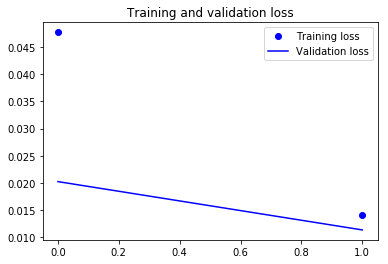

In [48]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epoch)
plt.figure()
plt.plot(epochs, loss,'bo',label = 'Training loss')
plt.plot(epochs, val_loss ,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

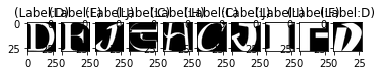

Reconstruction of Test Images


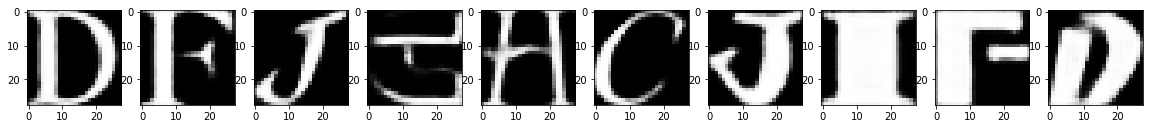

In [49]:
# predicting on Test data
pred = autoencoder.predict(test_data)
pred.shape
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(test_data[i,...,0],cmap='gray')
    curr_lbl= test_labels[i]
    plt.title("(Label:"+str(label_dict[curr_lbl])+")")
plt.show()
plt.figure(figsize=(20,4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10,i+1)
    plt.imshow(pred[i,...,0], cmap='gray')
plt.show()
